In [107]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization, Flatten

In [108]:
train_df = pd.read_csv(r"C:\Users\91797\Downloads\digit-recognizer\train.csv")
test_df = pd.read_csv(r"C:\Users\91797\Downloads\digit-recognizer\test.csv")
print(f"The shape of the train images: {train_df.shape}")
print(f"The shape of the test images: {test_df.shape}")

The shape of the train images: (42000, 785)
The shape of the test images: (28000, 784)


In [109]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Combining the train and test data

In [110]:
df = pd.concat([train_df, test_df])
df.shape

(70000, 785)

Splitting the data into training and validation set

In [111]:
train_images = train_df.iloc[:,1:].values.reshape(-1,28,28,1)

In [112]:
train_images.shape

(42000, 28, 28, 1)

In [113]:
x_train, x_test, y_train, y_test = train_test_split(train_images, train_df['label'], test_size=0.1, random_state=0)

In [114]:
y_train.shape

(37800,)

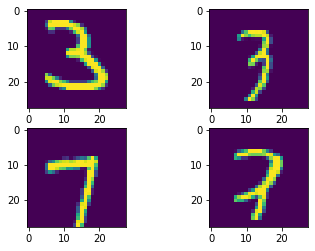

In [115]:
plt.figure(1)
plt.subplot(221)
plt.imshow(x_train[33][:,:,0])

plt.subplot(222)
plt.imshow(x_train[3333][:,:,0])

plt.subplot(223)
plt.imshow(x_train[3][:,:,0])

plt.subplot(224)
plt.imshow(x_train[419][:,:,0])
plt.show()

Applying CNN

In [116]:
def define_model():
    
    model = Sequential()
    model.add(Conv2D(32,(5,5), activation = 'relu', input_shape = (28,28,1), padding = 'same'))
    model.add(MaxPool2D((3,3)))
    model.add(BatchNormalization())
    model.add((Conv2D(64,(5,5), activation = 'relu', padding = 'same')))
    model.add(MaxPool2D(2,2))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(128, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(64, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation = 'softmax'))
    
    return model
    

In [117]:
x_train.shape

(37800, 28, 28, 1)

In [118]:
model = define_model()
#history = model.fit(x_train, y_train, epochs = 20, batch_size = 30)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                                 
 batch_normalization_10 (Bat  (None, 9, 9, 32)         128       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 64)          51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                      

In [119]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=30,batch_size=30)

Epoch 1/30


C:\Users\91797\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1260/1260 [==============================] - 37s 28ms/step - loss: 0.1935 - accuracy: 0.9428
Epoch 2/30
1260/1260 [==============================] - 49s 39ms/step - loss: 0.0843 - accuracy: 0.9743
Epoch 3/30
1260/1260 [==============================] - 51s 40ms/step - loss: 0.0660 - accuracy: 0.9805
Epoch 4/30
1260/1260 [==============================] - 51s 41ms/step - loss: 0.0498 - accuracy: 0.9850
Epoch 5/30
1260/1260 [==============================] - 50s 40ms/step - loss: 0.0441 - accuracy: 0.9863
Epoch 6/30
1260/1260 [==============================] - 50s 40ms/step - loss: 0.0397 - accuracy: 0.9876
Epoch 7/30
1260/1260 [==============================] - 51s 40ms/step - loss: 0.0334 - accuracy: 0.9896
Epoch 8/30
1260/1260 [==============================] - 49s 39ms/step - loss: 0.0310 - accuracy: 0.9903
Epoch 9/30
1260/1260 [==============================] - 51s 40ms/step - loss: 0.0256 - accuracy: 0.9922
Epoch 10/30
1260/1260 [==============================] - 50s 40ms/step - lo

In [148]:
x_test.shape

(4200, 28, 28, 1)

In [149]:
#test_images = x_test.values.reshape(-1, 28, 28, 1)
test_images = x_test

In [150]:
predictions = np.argmax(model.predict(test_images), axis=1)

132/132 [==============================] - 1s 5ms/step


In [151]:
def Trial():
  fig, ax = plt.subplots(5, 5, figsize=(15, 15))
  for index, axi in enumerate(ax.flat):
    axi.imshow(x_test[index].reshape(28, 28), cmap='gray', interpolation='nearest')
    axi.set(xticks=[], yticks=[],
                xlabel=str(predictions[index]))
  plt.show()

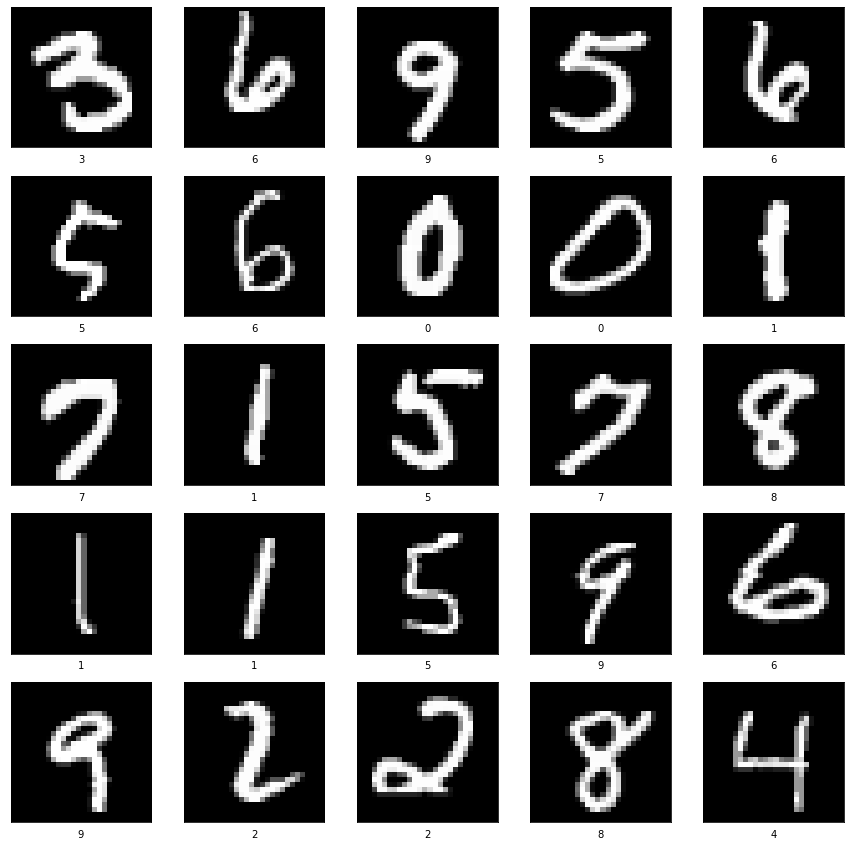

In [152]:
Trial()

In [153]:
predictions

array([3, 6, 9, ..., 9, 3, 7], dtype=int64)

In [154]:
predictions.size

4200

In [155]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions)

0.15333333333333332

In [156]:
test_images = test_df.values.reshape(-1,28,28,1)
yhat = np.argmax(model.predict(test_images), axis=1)

875/875 [==============================] - 4s 5ms/step


In [157]:
yhat.shape

(28000,)

In [167]:
def TrialonTestSet():
  fig, ax = plt.subplots(5, 5, figsize=(15, 15))
  for index, axi in enumerate(ax.flat):
    axi.imshow(test_images[index].reshape(28, 28), cmap='gray', interpolation='nearest')
    axi.set(xticks=[], yticks=[],
                xlabel=str(yhat[index]))
  plt.show()

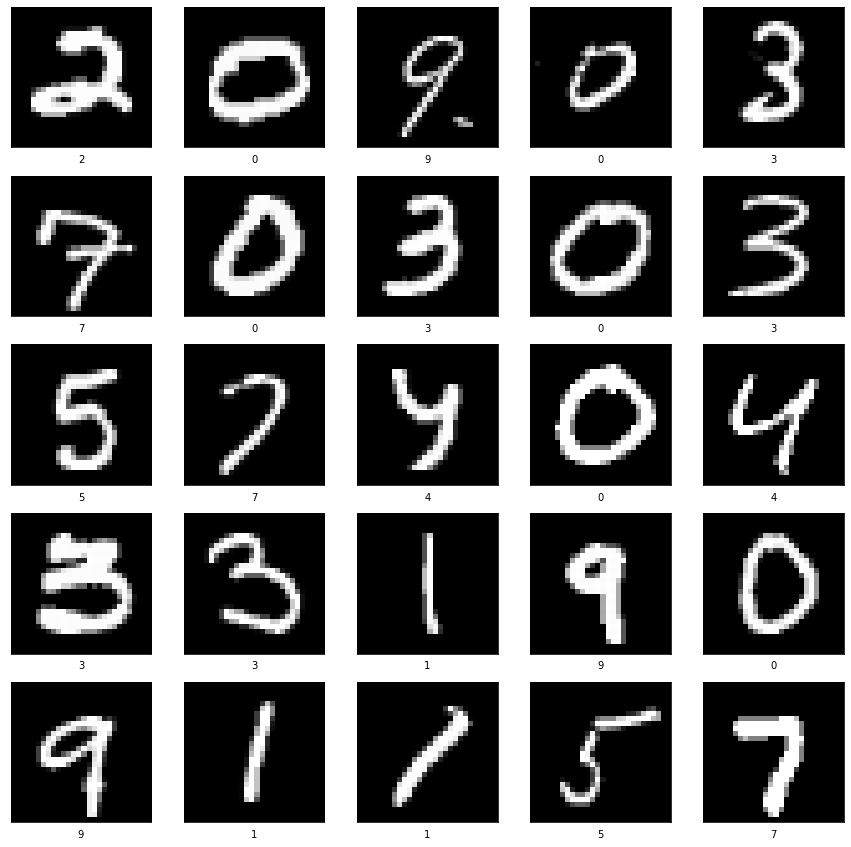

In [168]:
TrialonTestSet()

In [169]:
pred = pd.DataFrame(yhat)
sub_df = pd.read_csv("C:/Users/91797/Downloads/sample_submission.csv", index_col=False)
datasets = pd.concat([sub_df['ImageId'], pred], axis=1)
datasets.columns = ['ImageId', 'Label']

In [170]:
datasets.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [171]:
datasets.shape

(28000, 2)

In [172]:
datasets.dtypes
#datasets.drop(datasets.columns[[0]], axis=1, inplace=True)


ImageId    int64
Label      int64
dtype: object

In [173]:
datasets = datasets.reset_index(drop=True)

In [174]:
datasets.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [175]:
datasets.to_csv("C:/Users/91797/Downloads/sample_submission.csv", index=False) 